In [4]:
! pip install yfinance


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
df = yf.download('RELIANCE.NS')

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
1996-01-01,3.742467,7.345901,7.358397,7.270925,7.319124,104121369
1996-01-02,3.713363,7.288776,7.363753,7.235222,7.328050,168743308
1996-01-03,3.741557,7.344116,7.745775,7.328050,7.408381,209323879
1996-01-04,3.706998,7.276280,7.297702,7.178097,7.274495,216900264
1996-01-05,3.681533,7.226296,7.247718,7.163816,7.247718,166708467


In [8]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2024-12-09,1295.150024,1295.150024,1315.000000,1293.099976,1303.00,14650002
2024-12-10,1284.849976,1284.849976,1294.900024,1280.199951,1289.25,16043729
2024-12-11,1278.199951,1278.199951,1290.000000,1276.050049,1285.00,11724373
2024-12-12,1262.900024,1262.900024,1278.199951,1260.599976,1270.00,20906813
2024-12-13,1272.849976,1272.849976,1275.199951,1239.599976,1260.00,28630222


In [9]:
df.columns = df.columns.droplevel(1)

In [10]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [11]:
type(df.Close)

pandas.core.series.Series

In [12]:
df1 = pd.DataFrame(df.Close)

In [13]:
df1

,Close
Date,
1996-01-01,7.345901
1996-01-02,7.288776
1996-01-03,7.344116
1996-01-04,7.276280
1996-01-05,7.226296
...,...
2024-12-09,1295.150024
2024-12-10,1284.849976
2024-12-11,1278.199951


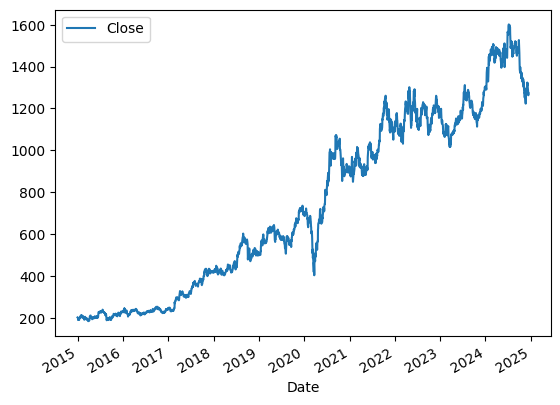

In [14]:
df1.loc['2015':].plot();

In [15]:
df.index

DatetimeIndex(['1996-01-01', '1996-01-02', '1996-01-03', '1996-01-04',
               '1996-01-05', '1996-01-08', '1996-01-09', '1996-01-10',
               '1996-01-11', '1996-01-12',
               ...
               '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05',
               '2024-12-06', '2024-12-09', '2024-12-10', '2024-12-11',
               '2024-12-12', '2024-12-13'],
              dtype='datetime64[ns]', name='Date', length=7270, freq=None)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7270 entries, 1996-01-01 to 2024-12-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   7270 non-null   float64
dtypes: float64(1)
memory usage: 371.6 KB


In [17]:
df1.size

7270

In [18]:
dm = df1.size-5

In [19]:
dm

7265

In [20]:
train = df1.iloc[:dm]
test = df1.iloc[dm:]

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
scaler.fit(train)

MinMaxScaler()

In [25]:
scaled_train = scaler.transform(train)

In [26]:
scaled_train[:5]

array([[0.0011648 ],
       [0.001129  ],
       [0.00116369],
       [0.00112117],
       [0.00108984]])

In [27]:
scaled_train.max(), scaled_train.min()

(np.float64(1.0000000000000002), np.float64(0.0))

In [28]:
scaled_test = scaler.transform(test)
scaled_test.max(), scaled_test.min()

(np.float64(0.8083567689139584), np.float64(0.7881425605655532))

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [30]:
scaled_train[:5]

array([[0.0011648 ],
       [0.001129  ],
       [0.00116369],
       [0.00112117],
       [0.00108984]])

In [31]:
n_input = 2
n_features=1

In [33]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [34]:
generator[0]

(array([[[0.0011648],
         [0.001129 ]]]),
 array([[0.00116369]]))

In [35]:
X, y = generator[0]

In [36]:
X

array([[[0.0011648],
        [0.001129 ]]])

In [37]:
y

array([[0.00116369]])

In [38]:
len(generator)

7263

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [40]:
n_input=5
n_features=1

train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [41]:
X,y = train_generator[0]

In [42]:
X.shape

(1, 5, 1)

In [43]:
X

array([[[0.0011648 ],
        [0.001129  ],
        [0.00116369],
        [0.00112117],
        [0.00108984]]])

In [67]:
model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(100, input_shape = (n_input, n_features), return_sequences=True),
        tf.keras.layers.LSTM(50, return_sequences= True),
        tf.keras.layers.LSTM(10),
        tf.keras.layers.Dense(64, activation= 'relu'),
        tf.keras.layers.Dense(64, activation= 'relu'),
        tf.keras.layers.Dense(64, activation= 'relu'),
        tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

d:\ItVedant\Time_Series\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 5, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 5, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 10)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,529 (322.38 KB)

 Trainable params: 82,529 (322.38 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=5)

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint= ModelCheckpoint(filepath="best_model.keras", monitor='loss', save_best_only=True)

In [70]:
model.fit(train_generator, epochs=10, callbacks=[callback, checkpoint])

Epoch 1/10


7260/7260 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.0027
Epoch 2/10
7260/7260 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 6.3048e-04
Epoch 3/10
7260/7260 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 4.7938e-04
Epoch 4/10
7260/7260 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - loss: 3.4381e-04
Epoch 5/10
7260/7260 ━━━━━━━━━━━━━━━━━━━━ 66s 8ms/step - loss: 3.3284e-04
Epoch 6/10
7260/7260 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - loss: 3.0958e-04
Epoch 7/10
7260/7260 ━━━━━━━━━━━━━━━━━━━━ 63s 9ms/step - loss: 2.0411e-04
Epoch 8/10
7260/7260 ━━━━━━━━━━━━━━━━━━━━ 61s 8ms/step - loss: 1.8089e-04
Epoch 9/10
7260/7260 ━━━━━━━━━━━━━━━━━━━━ 61s 8ms/step - loss: 1.5501e-04
Epoch 10/10
7260/7260 ━━━━━━━━━━━━━━━━━━━━ 61s 8ms/step - loss: 1.4574e-04


In [49]:
my_pred = []

first_eval_batch = scaled_train[-n_input:]

current_batch = first_eval_batch.reshape(1,n_input,n_features)

for i in range(len(test)):
    pred = model.predict(current_batch)[0]
    my_pred.append(pred)

    current_batch=np.append(current_batch[:,1:,:],[[pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [53]:
current_batch

array([[[0.83619112],
        [0.85378528],
        [0.86479384],
        [0.87588191],
        [0.88742697]]])

In [52]:
my_pred

[array([0.8361911], dtype=float32),
 array([0.8537853], dtype=float32),
 array([0.86479384], dtype=float32),
 array([0.8758819], dtype=float32),
 array([0.887427], dtype=float32)]

In [54]:
my_pred=scaler.inverse_transform(my_pred)
my_pred

array([[1339.55729157],
       [1367.62723161],
       [1385.19042653],
       [1402.88047682],
       [1421.29961277]])

In [55]:
test

,Close
Date,
2024-12-09,1295.150024
2024-12-10,1284.849976
2024-12-11,1278.199951
2024-12-12,1262.900024
2024-12-13,1272.849976


In [56]:
test['Prediction']=my_pred
test

C:\Users\HP\AppData\Local\Temp\ipykernel_5068\706281454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction']=my_pred


,Close,Prediction
Date,,
2024-12-09,1295.150024,1339.557292
2024-12-10,1284.849976,1367.627232
2024-12-11,1278.199951,1385.190427
2024-12-12,1262.900024,1402.880477
2024-12-13,1272.849976,1421.299613


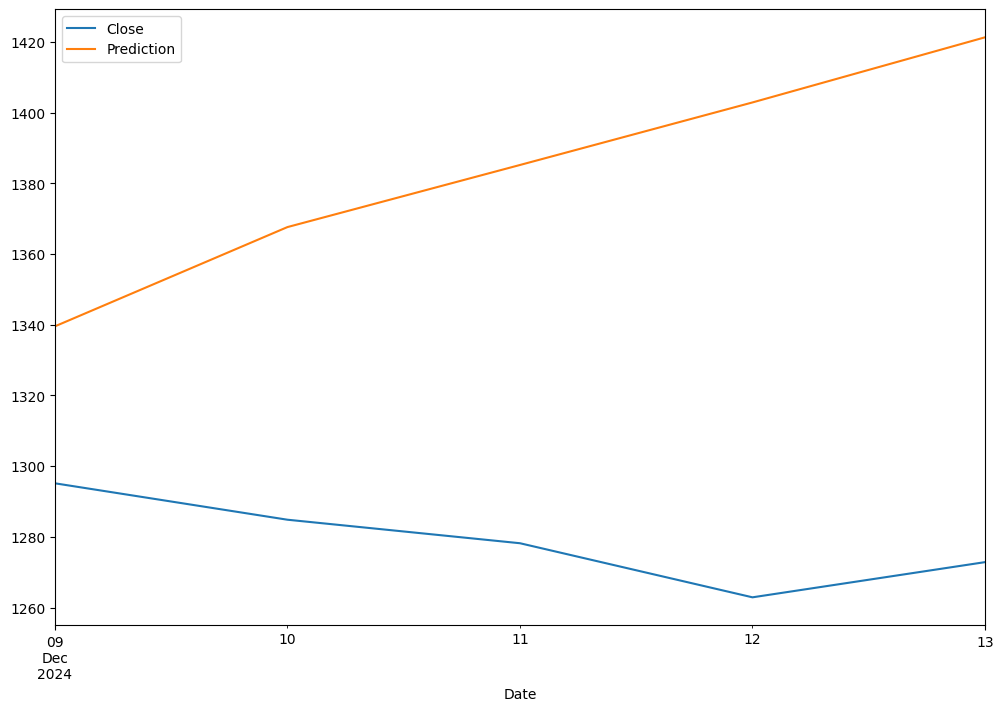

In [57]:
test.plot(figsize=(12,8))
plt.show()

In [71]:
model.load_weights('best_model.keras')

In [72]:
my_pred = []

first_eval_batch = scaled_train[-n_input:]

current_batch = first_eval_batch.reshape(1,n_input,n_features)

for i in range(len(test)):
    pred = model.predict(current_batch)[0]
    my_pred.append(pred)

    current_batch=np.append(current_batch[:,1:,:],[[pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [73]:
my_pred

[array([0.8174835], dtype=float32),
 array([0.81667614], dtype=float32),
 array([0.81595457], dtype=float32),
 array([0.81538326], dtype=float32),
 array([0.8145135], dtype=float32)]

In [74]:
my_pred=scaler.inverse_transform(my_pred)
my_pred

array([[1309.71090063],
       [1308.42285249],
       [1307.27164461],
       [1306.36016868],
       [1304.97255713]])

In [75]:
test

,Close,Prediction,%error
Date,,,
2024-12-09,1295.150024,1308.274411,-1.01
2024-12-10,1284.849976,1310.237626,-1.98
2024-12-11,1278.199951,1309.297907,-2.43
2024-12-12,1262.900024,1308.098962,-3.58
2024-12-13,1272.849976,1306.962874,-2.68


In [76]:
test['Prediction']=my_pred
test

C:\Users\HP\AppData\Local\Temp\ipykernel_5068\706281454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction']=my_pred


,Close,Prediction,%error
Date,,,
2024-12-09,1295.150024,1309.710901,-1.01
2024-12-10,1284.849976,1308.422852,-1.98
2024-12-11,1278.199951,1307.271645,-2.43
2024-12-12,1262.900024,1306.360169,-3.58
2024-12-13,1272.849976,1304.972557,-2.68


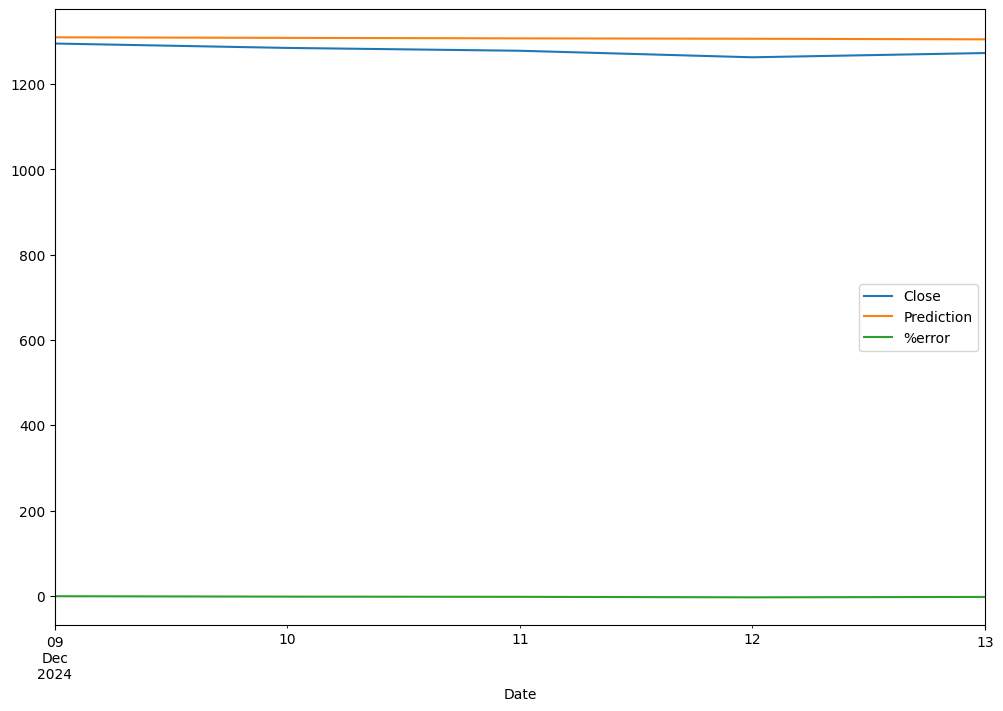

In [77]:
test.plot(figsize=(12,8))
plt.show()

In [65]:
test['%error'] = np.round((test['Close']-test['Prediction'])*100/test['Close'],2)

C:\Users\HP\AppData\Local\Temp\ipykernel_5068\2699551822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['%error'] = np.round((test['Close']-test['Prediction'])*100/test['Close'],2)


In [66]:
test

,Close,Prediction,%error
Date,,,
2024-12-09,1295.150024,1308.274411,-1.01
2024-12-10,1284.849976,1310.237626,-1.98
2024-12-11,1278.199951,1309.297907,-2.43
2024-12-12,1262.900024,1308.098962,-3.58
2024-12-13,1272.849976,1306.962874,-2.68
